In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [4]:
titles = [title.rstrip() for title in open("/content/all_book_titles.txt")]

In [6]:
wordnet_lemmatizer = WordNetLemmatizer()

stopwords = set(w.rstrip() for w in open("/content/stopwords.txt"))
stopwords = stopwords.union({'introduction', 'edition', 'series', 'application', 'approach', 'card', 'access',
                             'package', 'plus', 'etext', 'brief', 'vol', 'fundamental', 'guide', 'essential',
                             'printed', 'third', 'second', 'fourth'})

In [20]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
def tokenizer(text):
  text_ = text.lower()
  tokens = nltk.word_tokenize(text)
  tokens = [t for t in tokens if len(t) > 2]
  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
  tokens = [t for t in tokens if t not in stopwords]
  tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
  return tokens

In [22]:
word_idx_map = {}
curr_idx = 0
all_titles = []
all_tokens = []
idx_word_map = []
for title in titles:
  try:
    title = title.encode('ascii', 'ignore').decode('utf-8')
    all_titles.append(title)
    tokens = tokenizer(title)
    all_tokens.append(tokens)
    for word in tokens:
      if word not in word_idx_map:
        word_idx_map[word] = curr_idx
        curr_idx += 1
        idx_word_map.append(word)

  except Exception as e:
        print(e)
        print(title)

In [24]:
def tokens_to_vector(tokens):
  word_vector = np.zeros(len(word_idx_map))
  for word in tokens:
    i = word_idx_map[word]
    word_vector[i] = 1
  return word_vector

In [25]:
N = len(all_tokens)
D = len(word_idx_map)
X = np.zeros((D, N))
i = 0
for tokens in all_tokens:
  X[:, i] = tokens_to_vector(tokens)
  i += 1

In [26]:
svd = TruncatedSVD()

Z = svd.fit_transform(X)

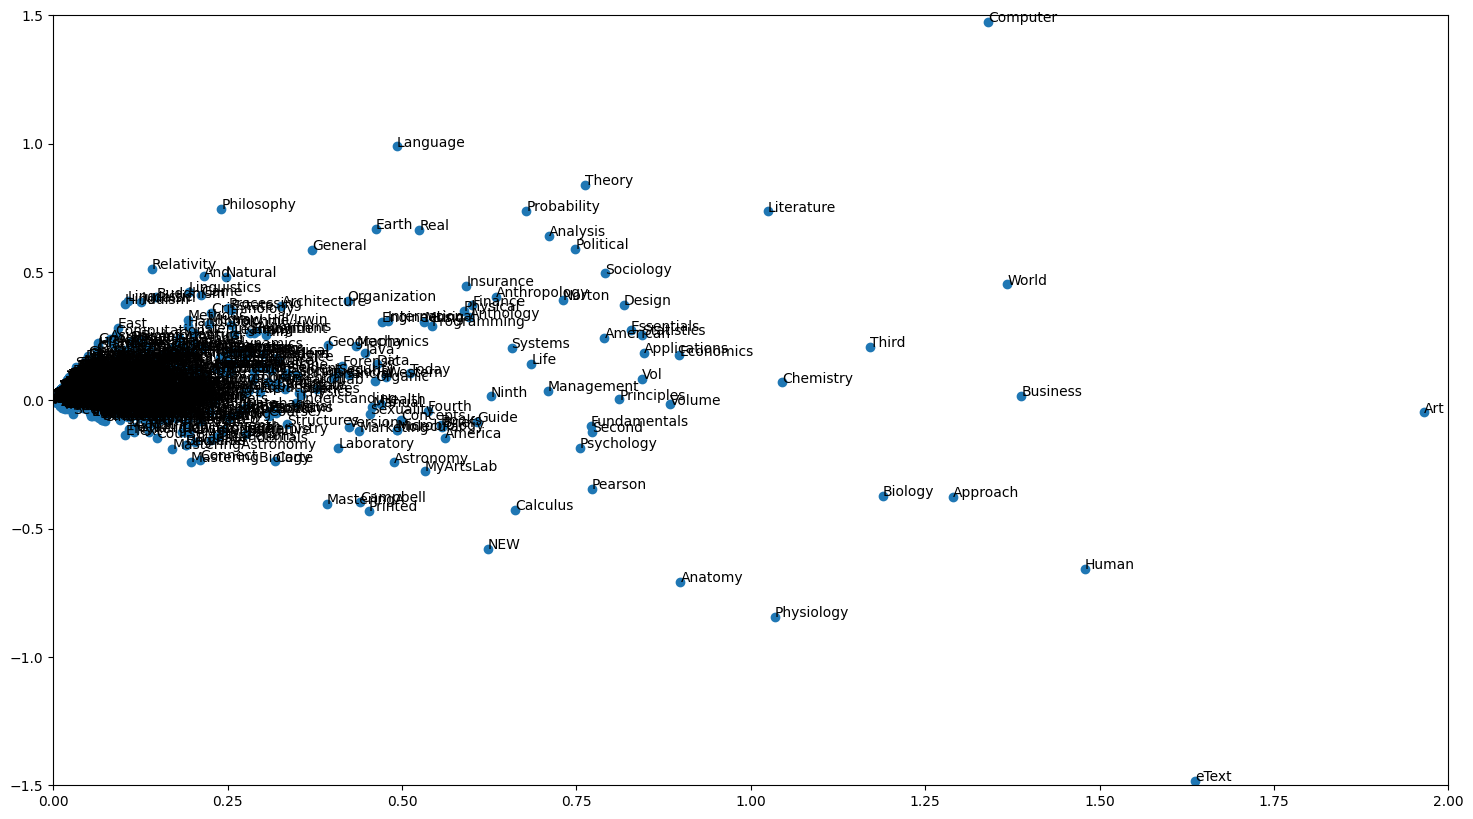

In [45]:
plt.figure(figsize=(18, 10))
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
  plt.annotate(text=idx_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.ylim(-1.5, 1.5)
plt.xlim(0, 2)
plt.show()